In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

def caminata2D(n=1000):
    deltaX = (np.random.random(n)-0.5)*2
    deltaY = (np.random.random(n)-0.5)*2
    L = np.sqrt(deltaX**2 + deltaY**2)
    deltaX = deltaX/L
    deltaY = deltaY/L
    x=np.cumsum(deltaX)
    y=np.cumsum(deltaY)
    r2 = x[-1]**2 + y[-1]**2
    return {'x':x, 'y':y, 'deltaX':deltaX, 'deltaY':deltaY, 'r2':r2}

In [27]:
def caminatas2D(n=1000):
    k=31
    r=[]
    m={}
    for i in range(k):
        m[i] = caminata2D(n)
        r.append(m[i]['r2'])
    rProm=sum(r)/k
    return m, rProm

R2 promedio de caminatas aleatorias 2D:  961.2654793120577


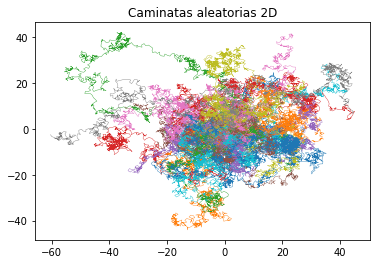

In [29]:
def plotCaminatas2D(n=1000):
    m, r = caminatas2D(n)
    plt.figure()
    for i in m.keys():
        plt.plot(m[i]['x'], m[i]['y'], linewidth=0.4)
    plt.title("Caminatas aleatorias 2D")
    plt.savefig("Caminatas2D.png")
    return r

r1 = plotCaminatas2D()
print('R2 promedio de caminatas aleatorias 2D: ', r1)

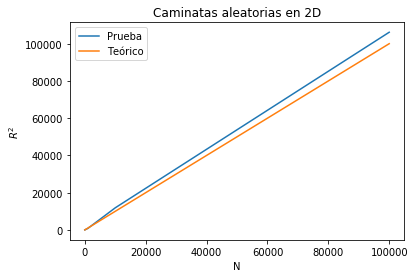

In [32]:
N = [10, 100, 1000, 10000, 100000]
r2n = []
for i in N:
    m2n, rn = caminatas2D(i)
    r2n.append(rn)
    
plt.figure()
plt.plot(N, r2n, label = ("Prueba"))
plt.plot(N, N, label = ("Teórico"))
plt.title('Caminatas aleatorias en 2D')
plt.legend()
plt.xlabel('N')
plt.ylabel('$R^2$')
plt.savefig('R2vsN.png')

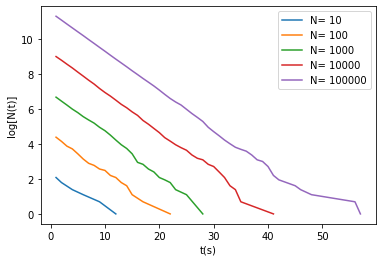

In [31]:
def decay(N, l=0.2*10**6):
    t0 = 0
    t = []
    n = []
    dn = []
    while N>0:
        dN = 0
        for i in range(N):
            if np.random.random()*10**6<l:
                dN+=1
        t0+=1
        t.append(t0)
        N-=dN
        if N>0 and dN>0:
            n.append(math.log(N))
            dn.append(math.log(dN))
        else:
            t.pop()
    return t, n, dn

N=[10, 100, 1000, 10000, 100000]
plt.figure()
for i in N:
    t, n, dn = decay(i)
    plt.plot(t, n, label = ('N= '+str(i)))
plt.legend()
plt.xlabel('t(s)')
plt.ylabel('log[N(t)]')
plt.savefig('log[N(t)]vsT(s)')